[View in Colaboratory](https://colab.research.google.com/github/santhavathi/Deep-Learning-MLBLR/blob/master/DNN.ipynb)

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.utils import np_utils
from keras.optimizers import SGD

from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


(60000, 28, 28)


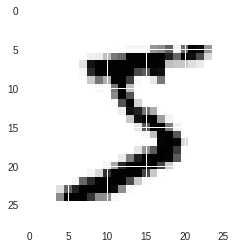

In [54]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [57]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [54]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_14 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [56]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 39s 655us/step - loss: 0.1902 - acc: 0.9455
Epoch 2/10
19168/60000 [========>.....................] - ETA: 26s - loss: 0.0654 - acc: 0.9806

60000/60000 [==============================] - 39s 649us/step - loss: 0.0671 - acc: 0.9794
Epoch 3/10
32672/60000 [===============>..............] - ETA: 17s - loss: 0.0494 - acc: 0.9848

60000/60000 [==============================] - 39s 651us/step - loss: 0.0498 - acc: 0.9844
Epoch 4/10
38592/60000 [==================>...........] - ETA: 13s - loss: 0.0359 - acc: 0.9892

60000/60000 [==============================] - 39s 651us/step - loss: 0.0390 - acc: 0.9876
Epoch 5/10
41344/60000 [===================>..........] - ETA: 12s - loss: 0.0280 - acc: 0.9911

60000/60000 [==============================] - 39s 647us/step - loss: 0.0298 - acc: 0.9905
Epoch 6/10
42464/60000 [====================>.........] - ETA: 11s - loss: 0.0229 - acc: 0.9923

60000/60000 [==============================] - 39s 646us/step - loss: 0.0232 - acc: 0.9923
Epoch 7/10
42816/60000 [====================>.........] - ETA: 11s - loss: 0.0194 - acc: 0.9932

60000/60000 [==============================] - 39s 648us/step - loss: 0.0203 - acc: 0.9930
Epoch 8/10
43072/60000 [====================>.........] - ETA: 11s - loss: 0.0136 - acc: 0.9956

60000/60000 [==============================] - 39s 654us/step - loss: 0.0148 - acc: 0.9953
Epoch 9/10
43232/60000 [====================>.........] - ETA: 10s - loss: 0.0122 - acc: 0.9960

60000/60000 [==============================] - 39s 652us/step - loss: 0.0129 - acc: 0.9959
Epoch 10/10
43232/60000 [====================>.........] - ETA: 10s - loss: 0.0086 - acc: 0.9971

60000/60000 [==============================] - 39s 646us/step - loss: 0.0098 - acc: 0.9969


In [57]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.10257896338440778, 0.978]


In [0]:
y_pred = model.predict(X_test)

In [66]:
print(y_pred[:9])
print(y_test[:9])

[[1.00127746e-33 2.37473993e-29 6.33821458e-20 3.14192516e-09
  7.90402717e-36 3.99499949e-24 0.00000000e+00 1.00000000e+00
  3.57610068e-15 9.97443658e-16]
 [8.73376272e-19 1.05356175e-17 1.00000000e+00 3.33501885e-17
  1.53687634e-31 6.15205749e-25 1.65097070e-12 1.13418687e-37
  4.83411431e-17 5.77895863e-29]
 [6.00833619e-11 9.99997735e-01 1.05736231e-09 5.59661302e-12
  2.08753158e-06 2.85256878e-14 7.84474916e-12 2.56375348e-08
  6.43905835e-08 5.48774984e-11]
 [1.00000000e+00 2.17430465e-26 7.52944929e-11 4.01834446e-21
  2.41257405e-25 8.41057850e-22 1.30504166e-16 1.31374079e-19
  6.27372902e-18 6.73751764e-16]
 [5.71484060e-22 6.06575305e-24 5.42644881e-16 3.91771088e-13
  9.99997377e-01 2.31268925e-22 1.39631117e-21 1.29384743e-13
  4.69449271e-11 2.64376581e-06]
 [1.31096917e-16 9.99999881e-01 7.22091115e-13 1.32282165e-13
  2.24967101e-10 7.99511714e-22 1.48020045e-15 1.45312242e-07
  4.57901361e-09 2.59416273e-12]
 [2.12250745e-28 1.81931106e-20 1.87775034e-12 5.77876286e

In [80]:
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 12))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 24, 24, 16)        4624      
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 24, 24, 16)        272       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 1, 1, 10)          23050     
_________________________________________________________________
flatten_22 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_17 (Activation)   (None, 10)                0         
Total para

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """


In [81]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.1674 - acc: 0.9496
Epoch 2/10
  736/60000 [..............................] - ETA: 1:23 - loss: 0.0607 - acc: 0.9810

60000/60000 [==============================] - 85s 1ms/step - loss: 0.0648 - acc: 0.9800
Epoch 3/10
 5152/60000 [=>............................] - ETA: 1:16 - loss: 0.0495 - acc: 0.9839

60000/60000 [==============================] - 84s 1ms/step - loss: 0.0486 - acc: 0.9850
Epoch 4/10
 7424/60000 [==>...........................] - ETA: 1:13 - loss: 0.0365 - acc: 0.9891

60000/60000 [==============================] - 85s 1ms/step - loss: 0.0381 - acc: 0.9882
Epoch 5/10
 7936/60000 [==>...........................] - ETA: 1:13 - loss: 0.0267 - acc: 0.9918

60000/60000 [==============================] - 85s 1ms/step - loss: 0.0309 - acc: 0.9906
Epoch 6/10
 8224/60000 [===>..........................] - ETA: 1:12 - loss: 0.0173 - acc: 0.9946

60000/60000 [==============================] - 84s 1ms/step - loss: 0.0260 - acc: 0.9917
Epoch 7/10
 8480/60000 [===>..........................] - ETA: 1:11 - loss: 0.0167 - acc: 0.9942

60000/60000 [==============================] - 85s 1ms/step - loss: 0.0217 - acc: 0.9930
Epoch 8/10
 8352/60000 [===>..........................] - ETA: 1:13 - loss: 0.0175 - acc: 0.9944

60000/60000 [==============================] - 86s 1ms/step - loss: 0.0181 - acc: 0.9940
Epoch 9/10
 8224/60000 [===>..........................] - ETA: 1:14 - loss: 0.0148 - acc: 0.9955

60000/60000 [==============================] - 86s 1ms/step - loss: 0.0165 - acc: 0.9943
Epoch 10/10
 7776/60000 [==>...........................] - ETA: 1:14 - loss: 0.0094 - acc: 0.9970

60000/60000 [==============================] - 86s 1ms/step - loss: 0.0132 - acc: 0.9954


In [82]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.05706005846480202, 0.9874]


In [86]:
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 12))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 24, 24, 16)        1040      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 1, 1, 10)          23050     
_________________________________________________________________
flatten_26 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_21 (Activation)   (None, 10)                0         
Total para

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """


In [87]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.1484 - acc: 0.9546

60000/60000 [==============================] - 150s 2ms/step - loss: 0.1483 - acc: 0.9546
Epoch 2/10
11808/60000 [====>.........................] - ETA: 2:00 - loss: 0.0527 - acc: 0.9846

60000/60000 [==============================] - 150s 3ms/step - loss: 0.0544 - acc: 0.9835


Epoch 3/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0408 - acc: 0.9874

60000/60000 [==============================] - 150s 2ms/step - loss: 0.0408 - acc: 0.9874
Epoch 4/10
11808/60000 [====>.........................] - ETA: 2:00 - loss: 0.0374 - acc: 0.9887

60000/60000 [==============================] - 150s 3ms/step - loss: 0.0328 - acc: 0.9893


Epoch 5/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0263 - acc: 0.9920

60000/60000 [==============================] - 151s 3ms/step - loss: 0.0263 - acc: 0.9920
Epoch 6/10
11808/60000 [====>.........................] - ETA: 2:00 - loss: 0.0191 - acc: 0.9936

60000/60000 [==============================] - 150s 3ms/step - loss: 0.0222 - acc: 0.9928


Epoch 7/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0181 - acc: 0.9940

60000/60000 [==============================] - 151s 3ms/step - loss: 0.0182 - acc: 0.9940
Epoch 8/10
11776/60000 [====>.........................] - ETA: 2:00 - loss: 0.0137 - acc: 0.9962

60000/60000 [==============================] - 150s 3ms/step - loss: 0.0164 - acc: 0.9948


Epoch 9/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0138 - acc: 0.9953

60000/60000 [==============================] - 150s 3ms/step - loss: 0.0138 - acc: 0.9953
Epoch 10/10
11744/60000 [====>.........................] - ETA: 2:01 - loss: 0.0092 - acc: 0.9968

60000/60000 [==============================] - 151s 3ms/step - loss: 0.0116 - acc: 0.9959


In [88]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.0540941081030338, 0.9861]


In [92]:
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 13))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 26, 26, 16)        528       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 1, 1, 10)          27050     
_________________________________________________________________
flatten_28 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_23 (Activation)   (None, 10)                0         
Total params: 27,898
Trainable params: 27,898
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


In [93]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 40s 674us/step - loss: 0.2173 - acc: 0.9371
Epoch 2/10
18784/60000 [========>.....................] - ETA: 27s - loss: 0.0826 - acc: 0.9757

60000/60000 [==============================] - 40s 665us/step - loss: 0.0786 - acc: 0.9764
Epoch 3/10
31744/60000 [==============>...............] - ETA: 18s - loss: 0.0608 - acc: 0.9817

60000/60000 [==============================] - 40s 665us/step - loss: 0.0621 - acc: 0.9811
Epoch 4/10
37696/60000 [=================>............] - ETA: 14s - loss: 0.0515 - acc: 0.9832

60000/60000 [==============================] - 40s 662us/step - loss: 0.0515 - acc: 0.9836
Epoch 5/10
40416/60000 [===================>..........] - ETA: 12s - loss: 0.0433 - acc: 0.9866

60000/60000 [==============================] - 40s 662us/step - loss: 0.0438 - acc: 0.9863
Epoch 6/10
41952/60000 [===================>..........] - ETA: 11s - loss: 0.0353 - acc: 0.9886

60000/60000 [==============================] - 38s 638us/step - loss: 0.0359 - acc: 0.9886
Epoch 7/10
42272/60000 [====================>.........] - ETA: 11s - loss: 0.0310 - acc: 0.9896

60000/60000 [==============================] - 40s 662us/step - loss: 0.0319 - acc: 0.9896
Epoch 8/10
41824/60000 [===================>..........] - ETA: 12s - loss: 0.0257 - acc: 0.9917

60000/60000 [==============================] - 40s 674us/step - loss: 0.0264 - acc: 0.9914
Epoch 9/10
40608/60000 [===================>..........] - ETA: 13s - loss: 0.0223 - acc: 0.9927

60000/60000 [==============================] - 40s 674us/step - loss: 0.0238 - acc: 0.9924
Epoch 10/10
41728/60000 [===================>..........] - ETA: 11s - loss: 0.0196 - acc: 0.9936

60000/60000 [==============================] - 38s 629us/step - loss: 0.0207 - acc: 0.9932


In [94]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.06246836629922036, 0.9836]


In [99]:
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(3,3))
model.add(Convolution2D(10, 8))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_143 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 24, 24, 16)        4624      
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 24, 24, 10)        170       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 10)          0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 1, 1, 10)          6410      
_________________________________________________________________
flatten_30 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_25 (Activation)   (None, 10)                0         
Total para

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """


In [100]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.2389 - acc: 0.9247
Epoch 2/10
  832/60000 [..............................] - ETA: 1:25 - loss: 0.0864 - acc: 0.9712

60000/60000 [==============================] - 85s 1ms/step - loss: 0.0733 - acc: 0.9777
Epoch 3/10
 5056/60000 [=>............................] - ETA: 1:18 - loss: 0.0553 - acc: 0.9842

60000/60000 [==============================] - 86s 1ms/step - loss: 0.0553 - acc: 0.9830
Epoch 4/10
 6688/60000 [==>...........................] - ETA: 1:16 - loss: 0.0424 - acc: 0.9865

60000/60000 [==============================] - 86s 1ms/step - loss: 0.0463 - acc: 0.9854
Epoch 5/10
 7552/60000 [==>...........................] - ETA: 1:14 - loss: 0.0380 - acc: 0.9886

60000/60000 [==============================] - 85s 1ms/step - loss: 0.0401 - acc: 0.9875
Epoch 6/10
 7712/60000 [==>...........................] - ETA: 1:15 - loss: 0.0293 - acc: 0.9898

60000/60000 [==============================] - 85s 1ms/step - loss: 0.0360 - acc: 0.9887
Epoch 7/10
 8448/60000 [===>..........................] - ETA: 1:13 - loss: 0.0281 - acc: 0.9911

60000/60000 [==============================] - 85s 1ms/step - loss: 0.0332 - acc: 0.9895
Epoch 8/10
 8384/60000 [===>..........................] - ETA: 1:13 - loss: 0.0222 - acc: 0.9925

60000/60000 [==============================] - 85s 1ms/step - loss: 0.0305 - acc: 0.9903
Epoch 9/10
 8480/60000 [===>..........................] - ETA: 1:12 - loss: 0.0324 - acc: 0.9903

60000/60000 [==============================] - 85s 1ms/step - loss: 0.0286 - acc: 0.9908
Epoch 10/10
 8640/60000 [===>..........................] - ETA: 1:12 - loss: 0.0222 - acc: 0.9935

60000/60000 [==============================] - 85s 1ms/step - loss: 0.0257 - acc: 0.9920


In [102]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.04704412840785517, 0.9869]


In [103]:
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(8, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 11))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_147 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 24, 24, 16)        4624      
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 22, 22, 8)         1160      
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 22, 22, 10)        90        
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 11, 11, 10)        0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 1, 1, 10)          12110     
_________________________________________________________________
flatten_31 (Flatten)         (None, 10)                0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  


In [104]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.1928 - acc: 0.9428

60000/60000 [==============================] - 110s 2ms/step - loss: 0.1927 - acc: 0.9428
Epoch 2/10
11808/60000 [====>.........................] - ETA: 1:28 - loss: 0.0808 - acc: 0.9761

60000/60000 [==============================] - 111s 2ms/step - loss: 0.0763 - acc: 0.9771


Epoch 3/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0582 - acc: 0.9822

60000/60000 [==============================] - 110s 2ms/step - loss: 0.0582 - acc: 0.9822
Epoch 4/10
11808/60000 [====>.........................] - ETA: 1:28 - loss: 0.0497 - acc: 0.9840

60000/60000 [==============================] - 111s 2ms/step - loss: 0.0488 - acc: 0.9851


Epoch 5/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0421 - acc: 0.9868

60000/60000 [==============================] - 111s 2ms/step - loss: 0.0421 - acc: 0.9868
Epoch 6/10
11808/60000 [====>.........................] - ETA: 1:28 - loss: 0.0315 - acc: 0.9900

60000/60000 [==============================] - 111s 2ms/step - loss: 0.0366 - acc: 0.9887


Epoch 7/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0319 - acc: 0.9901

60000/60000 [==============================] - 111s 2ms/step - loss: 0.0319 - acc: 0.9902
Epoch 8/10
11808/60000 [====>.........................] - ETA: 1:28 - loss: 0.0265 - acc: 0.9920

60000/60000 [==============================] - 111s 2ms/step - loss: 0.0288 - acc: 0.9908


Epoch 9/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0246 - acc: 0.9917

60000/60000 [==============================] - 111s 2ms/step - loss: 0.0246 - acc: 0.9917
Epoch 10/10
11744/60000 [====>.........................] - ETA: 1:30 - loss: 0.0156 - acc: 0.9953

60000/60000 [==============================] - 112s 2ms/step - loss: 0.0231 - acc: 0.9925


In [105]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.05274732987669122, 0.9861]


In [106]:
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 12))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_152 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 24, 24, 10)        330       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 1, 1, 10)          14410     
_________________________________________________________________
flatten_32 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_27 (Activation)   (None, 10)                0         
Total para

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """


In [107]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.2054 - acc: 0.9389

60000/60000 [==============================] - 114s 2ms/step - loss: 0.2053 - acc: 0.9389
Epoch 2/10
11808/60000 [====>.........................] - ETA: 1:30 - loss: 0.0728 - acc: 0.9779

60000/60000 [==============================] - 113s 2ms/step - loss: 0.0665 - acc: 0.9803


Epoch 3/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0511 - acc: 0.9839

60000/60000 [==============================] - 112s 2ms/step - loss: 0.0511 - acc: 0.9839
Epoch 4/10
11808/60000 [====>.........................] - ETA: 1:28 - loss: 0.0378 - acc: 0.9878

60000/60000 [==============================] - 112s 2ms/step - loss: 0.0406 - acc: 0.9871


Epoch 5/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0344 - acc: 0.9890

60000/60000 [==============================] - 112s 2ms/step - loss: 0.0344 - acc: 0.9890
Epoch 6/10
11808/60000 [====>.........................] - ETA: 1:29 - loss: 0.0242 - acc: 0.9921

60000/60000 [==============================] - 112s 2ms/step - loss: 0.0293 - acc: 0.9904


Epoch 7/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0257 - acc: 0.9917

60000/60000 [==============================] - 112s 2ms/step - loss: 0.0257 - acc: 0.9917
Epoch 8/10
11808/60000 [====>.........................] - ETA: 1:30 - loss: 0.0163 - acc: 0.9947

60000/60000 [==============================] - 112s 2ms/step - loss: 0.0210 - acc: 0.9933


Epoch 9/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0192 - acc: 0.9935

60000/60000 [==============================] - 112s 2ms/step - loss: 0.0192 - acc: 0.9935
Epoch 10/10
11744/60000 [====>.........................] - ETA: 1:30 - loss: 0.0165 - acc: 0.9957

60000/60000 [==============================] - 112s 2ms/step - loss: 0.0173 - acc: 0.9946


In [108]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.055117777645571915, 0.9855]


In [111]:
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 12))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_162 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 24, 24, 16)        4624      
_________________________________________________________________
dropout_11 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 24, 24, 16)        272       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 1, 1, 10)          23050     
_________________________________________________________________
flatten_35 (Flatten)         (None, 10)                0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """


In [112]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
45728/60000 [=====================>........] - ETA: 22s - loss: 0.2834 - acc: 0.9155

60000/60000 [==============================] - 94s 2ms/step - loss: 0.2420 - acc: 0.9278
Epoch 2/10
17440/60000 [=======>......................] - ETA: 1:05 - loss: 0.0912 - acc: 0.9732

60000/60000 [==============================] - 93s 2ms/step - loss: 0.0821 - acc: 0.9748
Epoch 3/10
 5024/60000 [=>............................] - ETA: 1:25 - loss: 0.0550 - acc: 0.9841

60000/60000 [==============================] - 93s 2ms/step - loss: 0.0622 - acc: 0.9804
Epoch 4/10


49568/60000 [=======================>......] - ETA: 16s - loss: 0.0521 - acc: 0.9844

60000/60000 [==============================] - 96s 2ms/step - loss: 0.0517 - acc: 0.9845
Epoch 5/10
13568/60000 [=====>........................] - ETA: 1:15 - loss: 0.0484 - acc: 0.9853

60000/60000 [==============================] - 97s 2ms/step - loss: 0.0468 - acc: 0.9858
Epoch 6/10


45760/60000 [=====================>........] - ETA: 23s - loss: 0.0424 - acc: 0.9867

60000/60000 [==============================] - 97s 2ms/step - loss: 0.0420 - acc: 0.9870
Epoch 7/10
12768/60000 [=====>........................] - ETA: 1:15 - loss: 0.0377 - acc: 0.9886

60000/60000 [==============================] - 97s 2ms/step - loss: 0.0384 - acc: 0.9879
Epoch 8/10


43872/60000 [====================>.........] - ETA: 26s - loss: 0.0336 - acc: 0.9889

60000/60000 [==============================] - 97s 2ms/step - loss: 0.0354 - acc: 0.9887
Epoch 9/10
11264/60000 [====>.........................] - ETA: 1:19 - loss: 0.0293 - acc: 0.9903

58752/60000 [============================>.] - ETA: 2s - loss: 0.0330 - acc: 0.9894

60000/60000 [==============================] - 97s 2ms/step - loss: 0.0332 - acc: 0.9894
Epoch 10/10
17504/60000 [=======>......................] - ETA: 1:08 - loss: 0.0300 - acc: 0.9900

60000/60000 [==============================] - 97s 2ms/step - loss: 0.0316 - acc: 0.9897


In [113]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03550854518567212, 0.9881]


In [114]:
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 13))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_166 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 26, 26, 16)        528       
_________________________________________________________________
dropout_12 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 1, 1, 10)          27050     
_________________________________________________________________
flatten_36 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_31 (Activation)   (None, 10)                0         
Total para

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


In [115]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 49s 819us/step - loss: 0.2424 - acc: 0.9263
Epoch 2/10
 6272/60000 [==>...........................] - ETA: 43s - loss: 0.1034 - acc: 0.9707

60000/60000 [==============================] - 49s 810us/step - loss: 0.0917 - acc: 0.9721
Epoch 3/10
11872/60000 [====>.........................] - ETA: 39s - loss: 0.0718 - acc: 0.9771

60000/60000 [==============================] - 48s 806us/step - loss: 0.0730 - acc: 0.9773
Epoch 4/10
15296/60000 [======>.......................] - ETA: 35s - loss: 0.0636 - acc: 0.9805

60000/60000 [==============================] - 48s 807us/step - loss: 0.0632 - acc: 0.9808
Epoch 5/10
16064/60000 [=======>......................] - ETA: 35s - loss: 0.0519 - acc: 0.9835

60000/60000 [==============================] - 49s 811us/step - loss: 0.0568 - acc: 0.9824
Epoch 6/10
16448/60000 [=======>......................] - ETA: 35s - loss: 0.0479 - acc: 0.9853

60000/60000 [==============================] - 48s 808us/step - loss: 0.0501 - acc: 0.9846
Epoch 7/10
16832/60000 [=======>......................] - ETA: 34s - loss: 0.0473 - acc: 0.9855

60000/60000 [==============================] - 49s 810us/step - loss: 0.0453 - acc: 0.9857
Epoch 8/10
16512/60000 [=======>......................] - ETA: 35s - loss: 0.0366 - acc: 0.9881

60000/60000 [==============================] - 48s 807us/step - loss: 0.0431 - acc: 0.9861
Epoch 9/10
16832/60000 [=======>......................] - ETA: 35s - loss: 0.0413 - acc: 0.9868

60000/60000 [==============================] - 49s 813us/step - loss: 0.0396 - acc: 0.9874
Epoch 10/10
16192/60000 [=======>......................] - ETA: 35s - loss: 0.0370 - acc: 0.9876

60000/60000 [==============================] - 48s 800us/step - loss: 0.0374 - acc: 0.9881


In [116]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.04866545837819576, 0.9845]


In [117]:
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 12))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_169 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 24, 24, 16)        4624      
_________________________________________________________________
dropout_13 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 24, 24, 16)        272       
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_172 (Conv2D)          (None, 1, 1, 10)          23050     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """


In [118]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.2256 - acc: 0.9326

60000/60000 [==============================] - 103s 2ms/step - loss: 0.2255 - acc: 0.9327
Epoch 2/10
11808/60000 [====>.........................] - ETA: 1:22 - loss: 0.0905 - acc: 0.9717

60000/60000 [==============================] - 102s 2ms/step - loss: 0.0852 - acc: 0.9735


Epoch 3/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0664 - acc: 0.9794

60000/60000 [==============================] - 102s 2ms/step - loss: 0.0663 - acc: 0.9794
Epoch 4/10
11808/60000 [====>.........................] - ETA: 1:22 - loss: 0.0604 - acc: 0.9813

60000/60000 [==============================] - 102s 2ms/step - loss: 0.0582 - acc: 0.9815


Epoch 5/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0513 - acc: 0.9839

60000/60000 [==============================] - 101s 2ms/step - loss: 0.0513 - acc: 0.9839
Epoch 6/10
11808/60000 [====>.........................] - ETA: 1:21 - loss: 0.0479 - acc: 0.9837

60000/60000 [==============================] - 103s 2ms/step - loss: 0.0494 - acc: 0.9841


Epoch 7/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0451 - acc: 0.9858

60000/60000 [==============================] - 103s 2ms/step - loss: 0.0451 - acc: 0.9858
Epoch 8/10
11808/60000 [====>.........................] - ETA: 1:22 - loss: 0.0354 - acc: 0.9881

60000/60000 [==============================] - 103s 2ms/step - loss: 0.0411 - acc: 0.9867


Epoch 9/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0403 - acc: 0.9869

60000/60000 [==============================] - 102s 2ms/step - loss: 0.0403 - acc: 0.9869
Epoch 10/10
11744/60000 [====>.........................] - ETA: 1:23 - loss: 0.0278 - acc: 0.9904

60000/60000 [==============================] - 103s 2ms/step - loss: 0.0376 - acc: 0.9877


In [119]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.044542449210956694, 0.9867]


In [12]:
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', dilation_rate=2, input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu', dilation_rate=2))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 24, 24, 16)        160       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 20, 20, 16)        2320      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 20, 20, 10)        170       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 10)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 1, 1, 10)          10010     
_________________________________________________________________
flatten_6 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total para

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", dilation_rate=2, input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", dilation_rate=2)`
  """


In [15]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 52s 870us/step - loss: 0.2229 - acc: 0.9319
Epoch 2/10
 3744/60000 [>.............................] - ETA: 48s - loss: 0.1028 - acc: 0.9701

60000/60000 [==============================] - 52s 861us/step - loss: 0.0794 - acc: 0.9761
Epoch 3/10
 8928/60000 [===>..........................] - ETA: 44s - loss: 0.0604 - acc: 0.9813

60000/60000 [==============================] - 52s 864us/step - loss: 0.0585 - acc: 0.9820
Epoch 4/10
11296/60000 [====>.........................] - ETA: 41s - loss: 0.0496 - acc: 0.9844

60000/60000 [==============================] - 52s 859us/step - loss: 0.0485 - acc: 0.9847
Epoch 5/10
12320/60000 [=====>........................] - ETA: 41s - loss: 0.0417 - acc: 0.9866

60000/60000 [==============================] - 52s 867us/step - loss: 0.0419 - acc: 0.9867
Epoch 6/10
12704/60000 [=====>........................] - ETA: 40s - loss: 0.0310 - acc: 0.9896

60000/60000 [==============================] - 51s 858us/step - loss: 0.0370 - acc: 0.9885
Epoch 7/10
12992/60000 [=====>........................] - ETA: 39s - loss: 0.0258 - acc: 0.9911

60000/60000 [==============================] - 51s 845us/step - loss: 0.0316 - acc: 0.9901
Epoch 8/10
13152/60000 [=====>........................] - ETA: 40s - loss: 0.0279 - acc: 0.9916

60000/60000 [==============================] - 51s 848us/step - loss: 0.0294 - acc: 0.9907
Epoch 9/10
13152/60000 [=====>........................] - ETA: 39s - loss: 0.0249 - acc: 0.9916

60000/60000 [==============================] - 51s 851us/step - loss: 0.0262 - acc: 0.9911
Epoch 10/10
13120/60000 [=====>........................] - ETA: 39s - loss: 0.0216 - acc: 0.9934

60000/60000 [==============================] - 51s 852us/step - loss: 0.0258 - acc: 0.9919


In [16]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.042718834021483784, 0.9867]


In [29]:
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', dilation_rate=2, input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 24, 24, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 5, 5, 10)          170       
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 10)          0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 1, 1, 10)          2510      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", dilation_rate=2, input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  


In [30]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 38s 639us/step - loss: 0.3144 - acc: 0.8974
Epoch 2/10
19584/60000 [========>.....................] - ETA: 26s - loss: 0.1327 - acc: 0.9594

60000/60000 [==============================] - 39s 645us/step - loss: 0.1199 - acc: 0.9626
Epoch 3/10
32832/60000 [===============>..............] - ETA: 17s - loss: 0.0987 - acc: 0.9688

60000/60000 [==============================] - 38s 637us/step - loss: 0.0953 - acc: 0.9704
Epoch 4/10
39008/60000 [==================>...........] - ETA: 13s - loss: 0.0805 - acc: 0.9746

60000/60000 [==============================] - 38s 638us/step - loss: 0.0818 - acc: 0.9741
Epoch 5/10
41536/60000 [===================>..........] - ETA: 11s - loss: 0.0744 - acc: 0.9767

60000/60000 [==============================] - 39s 643us/step - loss: 0.0735 - acc: 0.9772
Epoch 6/10
42720/60000 [====================>.........] - ETA: 11s - loss: 0.0665 - acc: 0.9793

60000/60000 [==============================] - 39s 642us/step - loss: 0.0667 - acc: 0.9793
Epoch 7/10
43296/60000 [====================>.........] - ETA: 10s - loss: 0.0649 - acc: 0.9797

60000/60000 [==============================] - 39s 643us/step - loss: 0.0640 - acc: 0.9800
Epoch 8/10
43616/60000 [====================>.........] - ETA: 10s - loss: 0.0616 - acc: 0.9804

60000/60000 [==============================] - 38s 640us/step - loss: 0.0609 - acc: 0.9808
Epoch 9/10
43744/60000 [====================>.........] - ETA: 10s - loss: 0.0588 - acc: 0.9813

60000/60000 [==============================] - 38s 638us/step - loss: 0.0581 - acc: 0.9817
Epoch 10/10
43456/60000 [====================>.........] - ETA: 10s - loss: 0.0538 - acc: 0.9830

60000/60000 [==============================] - 38s 639us/step - loss: 0.0540 - acc: 0.9830


In [31]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.037724575306486804, 0.9882]


In [36]:
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', dilation_rate=2, input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(SeparableConv2D(16, 3, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 24, 24, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 10, 10, 16)        816       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 5, 5, 10)          170       
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 5, 10)          0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 1, 1, 10)          2510      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", dilation_rate=2, input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(16, (3, 3), activation="relu")`
  


In [37]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 37s 615us/step - loss: 0.4361 - acc: 0.8557
Epoch 2/10
20096/60000 [=========>....................] - ETA: 24s - loss: 0.1433 - acc: 0.9562

60000/60000 [==============================] - 37s 611us/step - loss: 0.1388 - acc: 0.9575
Epoch 3/10
33312/60000 [===============>..............] - ETA: 16s - loss: 0.1198 - acc: 0.9618

60000/60000 [==============================] - 37s 612us/step - loss: 0.1177 - acc: 0.9627
Epoch 4/10
39360/60000 [==================>...........] - ETA: 12s - loss: 0.1083 - acc: 0.9672

60000/60000 [==============================] - 37s 611us/step - loss: 0.1075 - acc: 0.9674
Epoch 5/10
42144/60000 [====================>.........] - ETA: 10s - loss: 0.0976 - acc: 0.9698

60000/60000 [==============================] - 37s 611us/step - loss: 0.0980 - acc: 0.9695
Epoch 6/10
43328/60000 [====================>.........] - ETA: 10s - loss: 0.0913 - acc: 0.9715

60000/60000 [==============================] - 37s 613us/step - loss: 0.0901 - acc: 0.9718
Epoch 7/10
44000/60000 [=====================>........] - ETA: 9s - loss: 0.0855 - acc: 0.9723

60000/60000 [==============================] - 37s 612us/step - loss: 0.0845 - acc: 0.9728
Epoch 8/10
44224/60000 [=====================>........] - ETA: 9s - loss: 0.0808 - acc: 0.9742

60000/60000 [==============================] - 37s 609us/step - loss: 0.0808 - acc: 0.9746
Epoch 9/10
44160/60000 [=====================>........] - ETA: 9s - loss: 0.0802 - acc: 0.9744

60000/60000 [==============================] - 37s 616us/step - loss: 0.0795 - acc: 0.9749
Epoch 10/10
44032/60000 [=====================>........] - ETA: 9s - loss: 0.0752 - acc: 0.9767

60000/60000 [==============================] - 37s 615us/step - loss: 0.0767 - acc: 0.9764


In [38]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.04231452104093041, 0.9862]


In [59]:
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', dilation_rate=2, input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Convolution2D(16, 3, 3, activation='relu', dilation_rate=2))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", dilation_rate=2, input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", dilation_rate=2)`
  import sys


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 24, 24, 32)        320       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 8, 8, 16)          4624      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 4, 4, 10)          170       
__________

In [60]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 41s 677us/step - loss: 0.3677 - acc: 0.8827
Epoch 2/10
18368/60000 [========>.....................] - ETA: 27s - loss: 0.1432 - acc: 0.9545

60000/60000 [==============================] - 40s 659us/step - loss: 0.1332 - acc: 0.9590
Epoch 3/10
32064/60000 [===============>..............] - ETA: 18s - loss: 0.1097 - acc: 0.9659

60000/60000 [==============================] - 39s 658us/step - loss: 0.1063 - acc: 0.9673
Epoch 4/10
38048/60000 [==================>...........] - ETA: 14s - loss: 0.0942 - acc: 0.9706

60000/60000 [==============================] - 40s 663us/step - loss: 0.0942 - acc: 0.9705
Epoch 5/10
40448/60000 [===================>..........] - ETA: 12s - loss: 0.0864 - acc: 0.9745

60000/60000 [==============================] - 40s 659us/step - loss: 0.0867 - acc: 0.9735
Epoch 6/10
42048/60000 [====================>.........] - ETA: 11s - loss: 0.0791 - acc: 0.9745

60000/60000 [==============================] - 39s 654us/step - loss: 0.0807 - acc: 0.9742
Epoch 7/10
42528/60000 [====================>.........] - ETA: 11s - loss: 0.0775 - acc: 0.9758

60000/60000 [==============================] - 39s 655us/step - loss: 0.0757 - acc: 0.9766
Epoch 8/10
43104/60000 [====================>.........] - ETA: 11s - loss: 0.0716 - acc: 0.9775

60000/60000 [==============================] - 39s 653us/step - loss: 0.0742 - acc: 0.9770
Epoch 9/10
43488/60000 [====================>.........] - ETA: 10s - loss: 0.0683 - acc: 0.9793

60000/60000 [==============================] - 39s 649us/step - loss: 0.0684 - acc: 0.9790
Epoch 10/10
40128/60000 [===================>..........] - ETA: 14s - loss: 0.0719 - acc: 0.9775

60000/60000 [==============================] - 42s 693us/step - loss: 0.0706 - acc: 0.9780


In [61]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.0344324719496537, 0.9884]


In [65]:
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', dilation_rate=2, input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Convolution2D(16, 3, 3, activation='relu', dilation_rate=2))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 4))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 24, 24, 32)        320       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 8, 8, 16)          4624      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 4, 4, 10)          170       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", dilation_rate=2, input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", dilation_rate=2)`
  import sys


In [66]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 40s 675us/step - loss: 0.7365 - acc: 0.7215
Epoch 2/10
17952/60000 [=======>......................] - ETA: 28s - loss: 0.4856 - acc: 0.7973

60000/60000 [==============================] - 43s 710us/step - loss: 0.4646 - acc: 0.8009
Epoch 3/10
23296/60000 [==========>...................] - ETA: 30s - loss: 0.4331 - acc: 0.8124

60000/60000 [==============================] - 44s 733us/step - loss: 0.4263 - acc: 0.8115
Epoch 4/10
33888/60000 [===============>..............] - ETA: 17s - loss: 0.4174 - acc: 0.8129

60000/60000 [==============================] - 40s 659us/step - loss: 0.4159 - acc: 0.8130
Epoch 5/10
38400/60000 [==================>...........] - ETA: 14s - loss: 0.3956 - acc: 0.8174

60000/60000 [==============================] - 40s 663us/step - loss: 0.3966 - acc: 0.8164
Epoch 6/10
39840/60000 [==================>...........] - ETA: 13s - loss: 0.3913 - acc: 0.8194

60000/60000 [==============================] - 40s 666us/step - loss: 0.3933 - acc: 0.8168
Epoch 7/10
41440/60000 [===================>..........] - ETA: 12s - loss: 0.3838 - acc: 0.8188

60000/60000 [==============================] - 40s 660us/step - loss: 0.3812 - acc: 0.8204
Epoch 8/10
42272/60000 [====================>.........] - ETA: 11s - loss: 0.3821 - acc: 0.8198

60000/60000 [==============================] - 39s 658us/step - loss: 0.3815 - acc: 0.8199
Epoch 9/10
42592/60000 [====================>.........] - ETA: 11s - loss: 0.3784 - acc: 0.8232

60000/60000 [==============================] - 39s 656us/step - loss: 0.3779 - acc: 0.8227
Epoch 10/10
42784/60000 [====================>.........] - ETA: 11s - loss: 0.3767 - acc: 0.8230

60000/60000 [==============================] - 39s 650us/step - loss: 0.3746 - acc: 0.8234


In [67]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.038829236471117475, 0.9871]


**Note:** Using 5x5 filter gives accuracy > 99%